In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("applicant_task.csv", parse_dates=['application_datetime', 'first_call', 'first_reach', 'trial_appointment_datetime'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    10000 non-null  int64         
 1   source                      10000 non-null  object        
 2   application_datetime        10000 non-null  datetime64[ns]
 3   gender                      5084 non-null   float64       
 4   first_call                  10000 non-null  datetime64[ns]
 5   first_reach                 9418 non-null   datetime64[ns]
 6   operator_group_type         10000 non-null  object        
 7   operator_group_name         10000 non-null  object        
 8   trial_appointment_datetime  10000 non-null  datetime64[ns]
 9   appointment_added_by_id     10000 non-null  int64         
 10  is_paid                     10000 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(3), object(3)
m

In [4]:
df.isnull().sum()

order_id                         0
source                           0
application_datetime             0
gender                        4916
first_call                       0
first_reach                    582
operator_group_type              0
operator_group_name              0
trial_appointment_datetime       0
appointment_added_by_id          0
is_paid                          0
dtype: int64

In [5]:
df.describe(include='object').T

,count,unique,top,freq
source,10000,29,91ce888e6774bd668a675b5640499103,7918
operator_group_type,10000,3,a170e8b5b0085420fa52f9f9e1d546f9,6557
operator_group_name,10000,24,d4f622b69e50e86a65cd6fae4bcf575f,6495


In [6]:
df.describe()

,order_id,gender,appointment_added_by_id,is_paid
count,1.000000e+04,5084.000000,1.000000e+04,10000.000000
mean,1.076241e+07,0.593627,5.180934e+06,0.501800
std,1.270724e+06,0.491204,2.850973e+06,0.500022
min,3.896499e+06,0.000000,-2.000000e+00,0.000000
25%,1.034630e+07,0.000000,3.969171e+06,0.000000
50%,1.103726e+07,1.000000,5.550269e+06,1.000000
75%,1.145767e+07,1.000000,6.453798e+06,1.000000
max,1.196107e+07,1.000000,1.129586e+07,1.000000


In [7]:
df

,order_id,source,application_datetime,gender,first_call,first_reach,operator_group_type,operator_group_name,trial_appointment_datetime,appointment_added_by_id,is_paid
0,10457322,a636bcf354a837fb5c25c3d5b940170b,2020-04-03 04:10:45,1.0,2020-04-03 16:43:59.508792,2020-04-03 22:11:27.455366,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-04-04 15:28:14.798018,6620229,0
1,11236929,91ce888e6774bd668a675b5640499103,2020-07-12 03:31:39,NaN,2020-07-12 04:47:12.312267,2020-07-12 07:05:38.094529,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-07-12 15:02:07.545403,4578767,0
2,10246280,91ce888e6774bd668a675b5640499103,2020-02-01 03:19:28,NaN,2020-02-04 04:45:20.910754,2020-02-04 10:42:35.204203,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2020-02-02 07:07:41.388133,6290758,0
3,11058994,a636bcf354a837fb5c25c3d5b940170b,2020-05-19 06:18:16,0.0,2020-05-19 07:18:45.609637,2020-05-19 08:39:54.048419,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-05-19 13:01:02.901309,4700850,0
4,10265283,91ce888e6774bd668a675b5640499103,2020-02-09 21:59:18,NaN,2020-02-10 09:14:45.941424,2020-02-10 20:01:01.297674,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-02-11 05:33:59.680231,4500083,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,11599028,91ce888e6774bd668a675b5640499103,2020-10-17 05:48:57,1.0,2020-10-18 08:04:36.321485,2020-10-18 10:46:51.360717,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-10-18 19:24:26.252242,6620219,0
9996,10408994,4502821cb71c7f2195cd4e542273fe38,2020-03-28 06:47:22,1.0,2020-03-28 11:32:57.580124,2020-03-28 16:58:14.577520,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-03-29 02:42:40.429751,4938827,1
9997,10180345,91ce888e6774bd668a675b5640499103,2020-01-19 18:06:19,NaN,2020-01-20 05:43:53.844271,2020-01-20 13:22:23.287301,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-01-21 16:52:45.897815,4740585,1
9998,11668432,91ce888e6774bd668a675b5640499103,2020-10-24 03:44:30,1.0,2020-10-24 04:07:02.355513,2020-10-24 04:57:06.940611,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-10-24 07:40:25.814410,6368898,0


### 2. Обработка признаков и визуализация целевой переменной

is_paid
0    4982
1    5018
Name: is_paid, dtype: int64


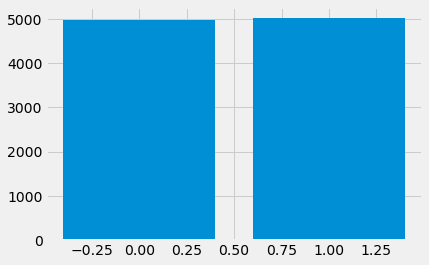

In [8]:
#Распределение целевой переменной равномерно. 
is_paid_group = df.groupby('is_paid')['is_paid'].count()
plt.bar(is_paid_group.index, is_paid_group)
print(is_paid_group)

In [9]:
#order_id - не привносит никакой полезной информации в модель - удалить. 
df2 = df.drop('order_id', axis=1)
df2

,source,application_datetime,gender,first_call,first_reach,operator_group_type,operator_group_name,trial_appointment_datetime,appointment_added_by_id,is_paid
0,a636bcf354a837fb5c25c3d5b940170b,2020-04-03 04:10:45,1.0,2020-04-03 16:43:59.508792,2020-04-03 22:11:27.455366,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-04-04 15:28:14.798018,6620229,0
1,91ce888e6774bd668a675b5640499103,2020-07-12 03:31:39,NaN,2020-07-12 04:47:12.312267,2020-07-12 07:05:38.094529,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-07-12 15:02:07.545403,4578767,0
2,91ce888e6774bd668a675b5640499103,2020-02-01 03:19:28,NaN,2020-02-04 04:45:20.910754,2020-02-04 10:42:35.204203,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2020-02-02 07:07:41.388133,6290758,0
3,a636bcf354a837fb5c25c3d5b940170b,2020-05-19 06:18:16,0.0,2020-05-19 07:18:45.609637,2020-05-19 08:39:54.048419,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-05-19 13:01:02.901309,4700850,0
4,91ce888e6774bd668a675b5640499103,2020-02-09 21:59:18,NaN,2020-02-10 09:14:45.941424,2020-02-10 20:01:01.297674,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-02-11 05:33:59.680231,4500083,0
...,...,...,...,...,...,...,...,...,...,...
9995,91ce888e6774bd668a675b5640499103,2020-10-17 05:48:57,1.0,2020-10-18 08:04:36.321485,2020-10-18 10:46:51.360717,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-10-18 19:24:26.252242,6620219,0
9996,4502821cb71c7f2195cd4e542273fe38,2020-03-28 06:47:22,1.0,2020-03-28 11:32:57.580124,2020-03-28 16:58:14.577520,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-03-29 02:42:40.429751,4938827,1
9997,91ce888e6774bd668a675b5640499103,2020-01-19 18:06:19,NaN,2020-01-20 05:43:53.844271,2020-01-20 13:22:23.287301,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-01-21 16:52:45.897815,4740585,1
9998,91ce888e6774bd668a675b5640499103,2020-10-24 03:44:30,1.0,2020-10-24 04:07:02.355513,2020-10-24 04:57:06.940611,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-10-24 07:40:25.814410,6368898,0


In [10]:
#1. source - хорошо подойдёт для определение наиболее конверсионного источника трафика и обратного ему.
#Но его вид несуразен. Заменю названия источников на читабельный вид
#2. Некоторые источники трафика не обросли достаточными инцидентами, чтобы проверять на них 
#Гипотезы и выявлять закономерность.
df['source'].value_counts()

91ce888e6774bd668a675b5640499103    7918
4502821cb71c7f2195cd4e542273fe38     802
a636bcf354a837fb5c25c3d5b940170b     436
4cedf3fbf9f7dc88b37bc42c66908c06     131
2916b0834eaf3921234cdd5f2a3d0a3a     126
f12c0522bfa2143e29832a5f3bf7c0b5      99
f5bffc1a757263e7b8b397484d2737d7      58
2c3991193c1da7c9e7ea14adbaf4ea50      53
e7d707a26e7f7b6ff52c489c60e429b1      53
cd48e195ee1a590504a0515b4f9b41e8      50
ac237ddf527733d443d6e3440d49a970      49
0cbc9029b6168ca138da344f4a06c2f7      42
f1a1996543f7c52fb277501d7f8abed9      27
b26ad2c2638544ba42dd2c16c77dd91a      25
2f57c79e2eeea3320dfdabe80ceecf64      24
583eb722b77d6c7791d1811f6a42450c      24
bdcf5fc18e4f01990300ed0d0a306428      15
8fe139ceee6bc394d46b1e960606a3d1      13
302b25d9f5e394b656b20a70615a52af       8
b0521b815783c8a1c07cab1f61a43b27       8
a77d267d7c75b97b497e18d447f8b67e       8
86b0d8c2e04798d4b539e1e3f04e5a45       7
2e27e68a4da0111ddf644ab75a93ac12       5
3f777e3bd400abe911a00a23a7891c52       5
5fea691deed5cf37

In [11]:
for i, source in enumerate(df2['source'].value_counts().index):
    df2['source'] = df2['source'].replace({source: i+1})
df2['source'].value_counts()

1     7918
2      802
3      436
4      131
5      126
6       99
7       58
8       53
9       53
10      50
11      49
12      42
13      27
14      25
16      24
15      24
17      15
18      13
19       8
20       8
21       8
22       7
23       5
24       5
26       4
25       4
27       3
28       2
29       1
Name: source, dtype: int64

**application_datetime** - нужна фича, которая позволит узнать о представлении заказа во времени

In [12]:
#Выделю из неё год, месяц, день недели и время, а на самой сделю resampling. Секунды и микросекунды исключу из анализа)
weekday = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
          4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

def separating_dates(dataframe, column):
    dataframe[column+'weekday'] = dataframe[column].dt.weekday.replace(weekday)
    dataframe[column+'hour'] = dataframe[column].dt.hour
    dataframe[column+'month'] = dataframe[column].dt.month
    dataframe[column+'month'] = dataframe[column].dt.month
    return dataframe

df2 = separating_dates(df2, 'application_datetime')

In [13]:
#С полом уже инетереснее. Больше половины пропущенных значений. Заливать всё средним или соседним значением
#Довольно топорно. Можно воспользоваться алгоритмом машинного обучения для предсказания пропусков
#или выделить их в отдельную группу. Сначала выделю их в группу "Непредставившихся"
df2['gender'].value_counts(dropna=False)

NaN    4916
1.0    3018
0.0    2066
Name: gender, dtype: int64

In [14]:
df2['gender'] = df2['gender'].fillna('unknow').astype('object')
df2['gender']

0          1.0
1       unknow
2       unknow
3          0.0
4       unknow
         ...  
9995       1.0
9996       1.0
9997    unknow
9998       1.0
9999    unknow
Name: gender, Length: 10000, dtype: object

**first_call и first_reach** - Не буду разбирать эту фичу на нюансы, а просто разделю разницу дат на промежутки, для последующей визуализации.

In [15]:
df2['reach_call_diff'] = df2['first_reach'] - df2['first_call']

In [16]:
bin_labels_5 = [1, 2, 3 ,4, 5, 6, 7, 8, 9, 10]
df2['qcut_reach_call'] = pd.qcut(df2['reach_call_diff'],
                              q = [.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.],
                              labels=bin_labels_5)

In [17]:
df2.drop(['first_call', 'first_reach', 'reach_call_diff'], axis=1, inplace=True)

**operator_group_type и operator_group_name** обработаю также как и source

In [18]:
for i, source in enumerate(df2['operator_group_type'].value_counts().index):
    df2['operator_group_type'] = df2['operator_group_type'].replace({source: 'operator_group_type{}'.format(i+1)})
df2['operator_group_type'].value_counts()

operator_group_type1    6557
operator_group_type2    3330
operator_group_type3     113
Name: operator_group_type, dtype: int64

In [19]:
#Явный перевес в строну 1 и 2 группы
for i, source in enumerate(df2['operator_group_name'].value_counts().index):
    df2['operator_group_name'] = df2['operator_group_name'].replace({source: 'operator_group_name{}'.format(i+1)})
df2['operator_group_name'].value_counts()

operator_group_name1     6495
operator_group_name2     3330
operator_group_name3       39
operator_group_name4       31
operator_group_name5       30
operator_group_name6       20
operator_group_name7       14
operator_group_name8        8
operator_group_name9        5
operator_group_name10       5
operator_group_name11       3
operator_group_name16       2
operator_group_name15       2
operator_group_name13       2
operator_group_name12       2
operator_group_name18       2
operator_group_name17       2
operator_group_name14       2
operator_group_name24       1
operator_group_name19       1
operator_group_name22       1
operator_group_name23       1
operator_group_name20       1
operator_group_name21       1
Name: operator_group_name, dtype: int64

**trial_appointment_datetime** - препарирую дату

In [20]:
df2 = separating_dates(df2, 'trial_appointment_datetime')
df2

,source,application_datetime,gender,operator_group_type,operator_group_name,trial_appointment_datetime,appointment_added_by_id,is_paid,application_datetimeweekday,application_datetimehour,application_datetimemonth,qcut_reach_call,trial_appointment_datetimeweekday,trial_appointment_datetimehour,trial_appointment_datetimemonth
0,3,2020-04-03 04:10:45,1.0,operator_group_type1,operator_group_name1,2020-04-04 15:28:14.798018,6620229,0,Friday,4,4,6,Saturday,15,4
1,1,2020-07-12 03:31:39,unknow,operator_group_type1,operator_group_name1,2020-07-12 15:02:07.545403,4578767,0,Sunday,3,7,3,Sunday,15,7
2,1,2020-02-01 03:19:28,unknow,operator_group_type2,operator_group_name2,2020-02-02 07:07:41.388133,6290758,0,Saturday,3,2,6,Sunday,7,2
3,3,2020-05-19 06:18:16,0.0,operator_group_type1,operator_group_name1,2020-05-19 13:01:02.901309,4700850,0,Tuesday,6,5,2,Tuesday,13,5
4,1,2020-02-09 21:59:18,unknow,operator_group_type1,operator_group_name1,2020-02-11 05:33:59.680231,4500083,0,Sunday,21,2,9,Tuesday,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2020-10-17 05:48:57,1.0,operator_group_type1,operator_group_name1,2020-10-18 19:24:26.252242,6620219,0,Saturday,5,10,3,Sunday,19,10
9996,2,2020-03-28 06:47:22,1.0,operator_group_type1,operator_group_name1,2020-03-29 02:42:40.429751,4938827,1,Saturday,6,3,6,Sunday,2,3
9997,1,2020-01-19 18:06:19,unknow,operator_group_type1,operator_group_name1,2020-01-21 16:52:45.897815,4740585,1,Sunday,18,1,8,Tuesday,16,1
9998,1,2020-10-24 03:44:30,1.0,operator_group_type1,operator_group_name1,2020-10-24 07:40:25.814410,6368898,0,Saturday,3,10,1,Saturday,7,10


In [21]:
#Я так понимаю в колцентре началиников гораздо больше чем работников :) Либо выборка не репрезентативна
df2['appointment_added_by_id'].value_counts()

-2           1292
 6453883      109
 5064182       77
 5550313       76
 2795419       74
             ... 
 2169502        1
 10534980       1
 7812615        1
 6267481        1
 5178461        1
Name: appointment_added_by_id, Length: 1101, dtype: int64

### 3. Анализ данных

In [22]:
df3 = df2.copy()

def c_for_test(column, num_of_samples):
    samples = []
    for i in range(1, num_of_samples + 1):
        samples.append(list(df3[df3[column] == i]['is_paid']))
    return samples

In [23]:
#Односторонняя ANOVA проверяет нулевую гипотезу о том, 
#что две или более групп имеют одинаковое среднее значение
#P-value намого больш 0.05, следовательно нулевая гипотеза не верна
samples = c_for_test('source', 10)
F, p = stats.mstats.f_oneway(samples[0], samples[1], samples[2], 
                            samples[3], samples[4], samples[5],
                            samples[6], samples[7], samples[8], samples[9])

In [24]:
#Самый конверcсионный source
vis_source_mean = df3.groupby(['source'])['is_paid'].mean().sort_index().head(10)
vis_source_count = df3.groupby(['source'])['is_paid'].count().sort_index().head(10)


 0.9585185791705048


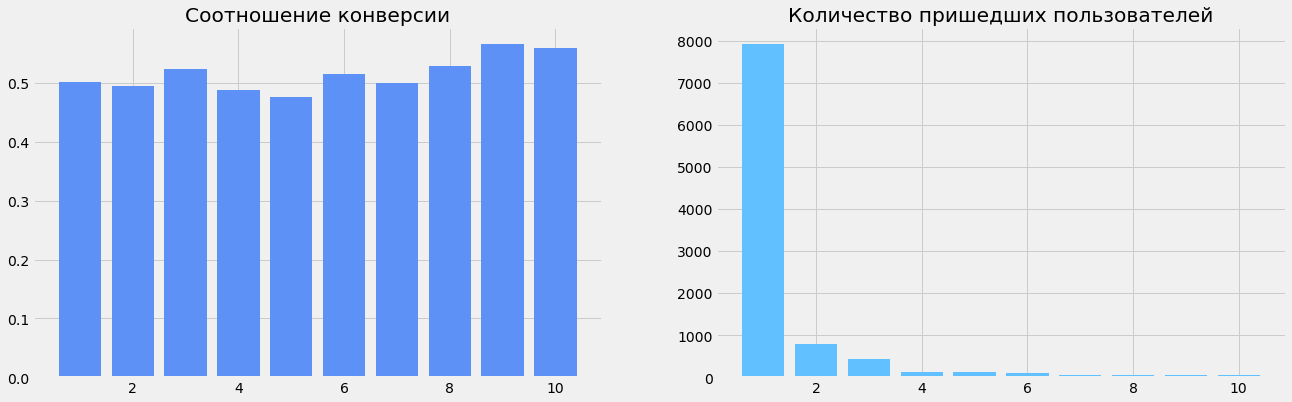

In [25]:
fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.flatten()
fig.set_size_inches(20, 6)

ax1.bar(vis_source_mean.index, vis_source_mean, color='#5D91F5')
ax1.set_title('Соотношение конверсии')

ax2.bar(vis_source_count.index, vis_source_count, color='#61C0FF')
ax2.set_title('Количество пришедших пользователей')
print('\n', p)

Видно, что в среднем конверсия по всем источникам одинаковая.  Но при этом подавляющее большинство трафика пришло с первых 3-х источников. Первую рекомендацию, которую я бы дал - это увеличить объем трафика на источники 8-10. Возможно от туда придут люди с потенциально большим C1. Также столь большой перевес в сторону одного из источников может сказать о том, что у нас в клиентах много людей с общими интересами, что нужно учесть при составлении скриптов и ретаргетинге.

Text(0.5, 1.0, 'Временной ряд заявок')

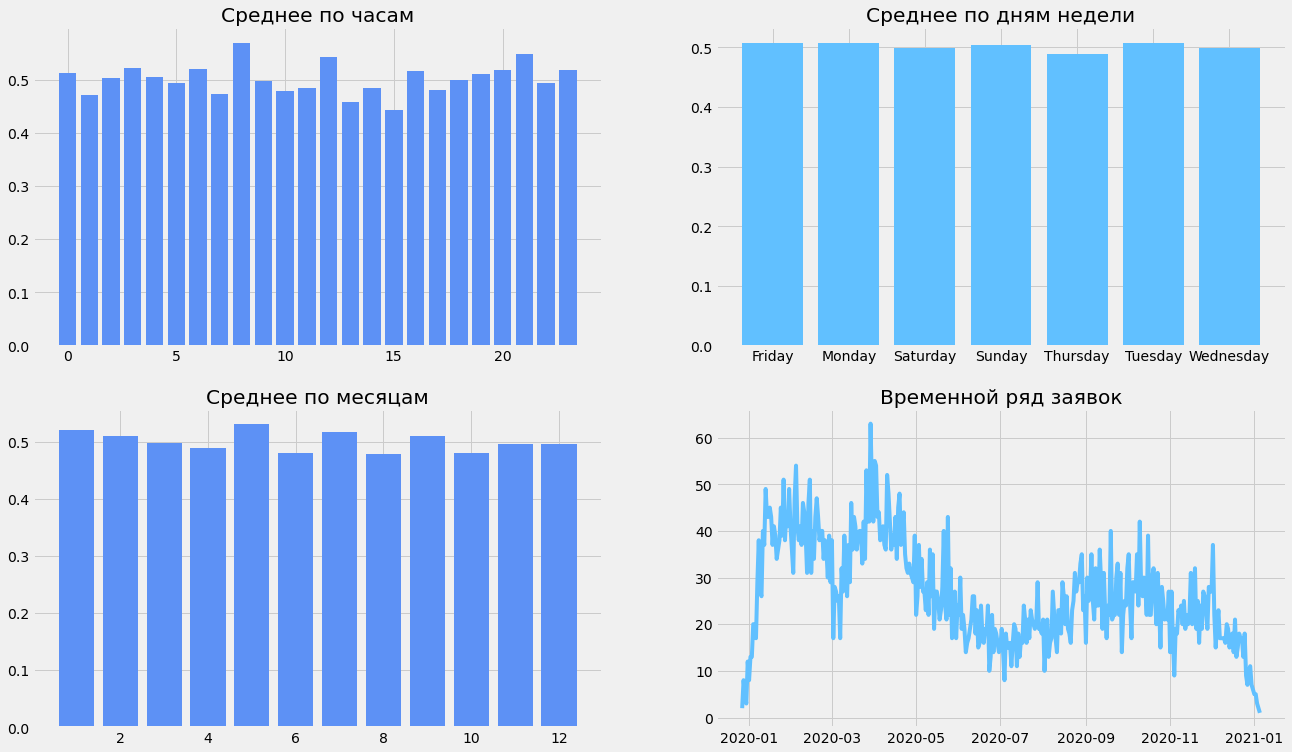

In [26]:
vis_hour_mean = df3.groupby('application_datetimehour')['is_paid'].mean()
vis_weekday_mean = df3.groupby('application_datetimeweekday')['is_paid'].mean()
vis_month_mean = df3.groupby('application_datetimemonth')['is_paid'].mean()

vis_resample = df3['is_paid']
vis_resample.index = df['application_datetime']
vis_resample = vis_resample.resample('D').count()

fig, ax = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = ax.flatten()
fig.set_size_inches(20, 12)

ax1.bar(vis_hour_mean.index, vis_hour_mean, color='#5D91F5')
ax1.set_title('Среднее по часам')

ax2.bar(vis_weekday_mean.index, vis_weekday_mean, color='#61C0FF')
ax2.set_title('Среднее по дням недели')

ax3.bar(vis_month_mean.index, vis_month_mean, color='#5D91F5')
ax3.set_title('Среднее по месяцам')

ax4.plot(vis_resample.index, vis_resample, color='#61C0FF')
ax4.set_title('Временной ряд заявок')

Визуально сложно определить различия между выборками. Но смотря на временной ряд, можно сделать вывод, что основная масса заказов приходится на осень и зиму. Данные имеют тренд и сезонность. Различия в выборках по часам и по дням недели определю статистически. Почему на новый год никто не хочет учить англиский? Слабо верится) Мне кажется, что просто не было соостветвующих акциий. **Следовательно - нужно придумать акции на новый год** 

In [27]:
samples = c_for_test('application_datetimehour', 23)
F, p = stats.mstats.f_oneway(samples[0], samples[1], samples[2], 
                            samples[3], samples[4], samples[5],
                            samples[6], samples[7], samples[8], samples[9], samples[10],
                            samples[11], samples[12], samples[13], samples[14], samples[15], samples[16],
                            samples[17], samples[18], samples[19], samples[20], samples[21], samples[22])
print('p-value выборок по часам: ', p)

p-value выборок по часам:  0.08671345679340069


Близка к 0.05 - я бы не стал отвергать нулевую гипотезу

In [28]:
samples = c_for_test('application_datetimemonth', 12)
F, p = stats.mstats.f_oneway(samples[0], samples[1], samples[2], 
                            samples[3], samples[4], samples[5],
                            samples[6], samples[7], samples[8], samples[9], samples[10],
                            samples[11])
print('p-value выборок по месяцам: ', p)

p-value выборок по месяцам:  0.48694818046000465



 0.4117639259966951


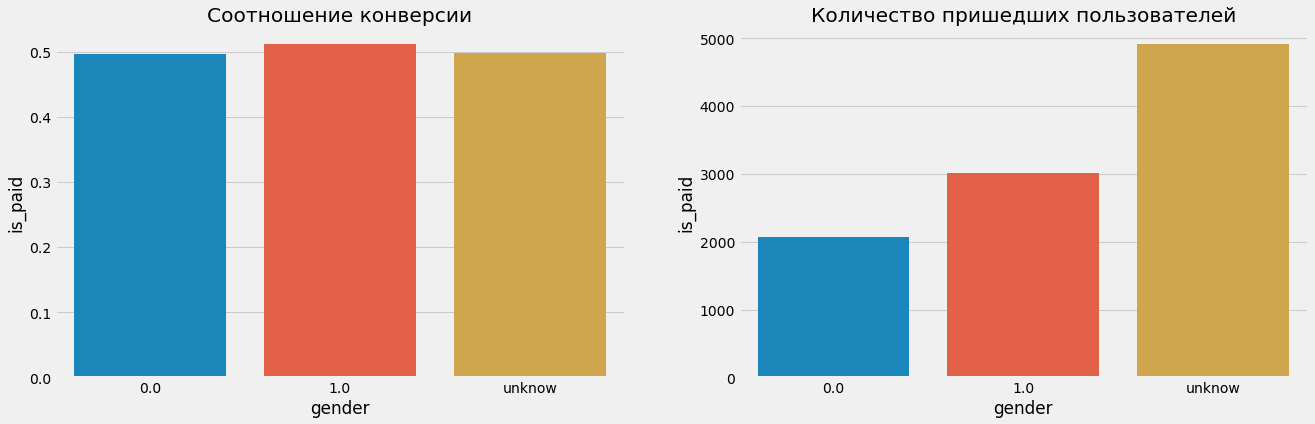

In [29]:
vis_gender_mean = df3.groupby('gender')['is_paid'].mean()
vis_gender_count = df3.groupby('gender')['is_paid'].count()

a = list(df3[df3['gender'] == 0.0]['is_paid'])
b = list(df3[df3['gender'] == 1.0]['is_paid'])
c = list(df3[df3['gender'] == 'unknow']['is_paid'])

F, p = stats.mstats.f_oneway(a, b, c)

fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.flatten()
fig.set_size_inches(20, 6)

sns.barplot(x=vis_gender_mean.index, y=vis_gender_mean, ax=ax1)
ax1.set_title('Соотношение конверсии')

sns.barplot(x=vis_gender_count.index, y=vis_gender_count, ax=ax2)
ax2.set_title('Количество пришедших пользователей')
print('\n', p)

Text(0.5, 1.0, 'Временной ряд заявок')

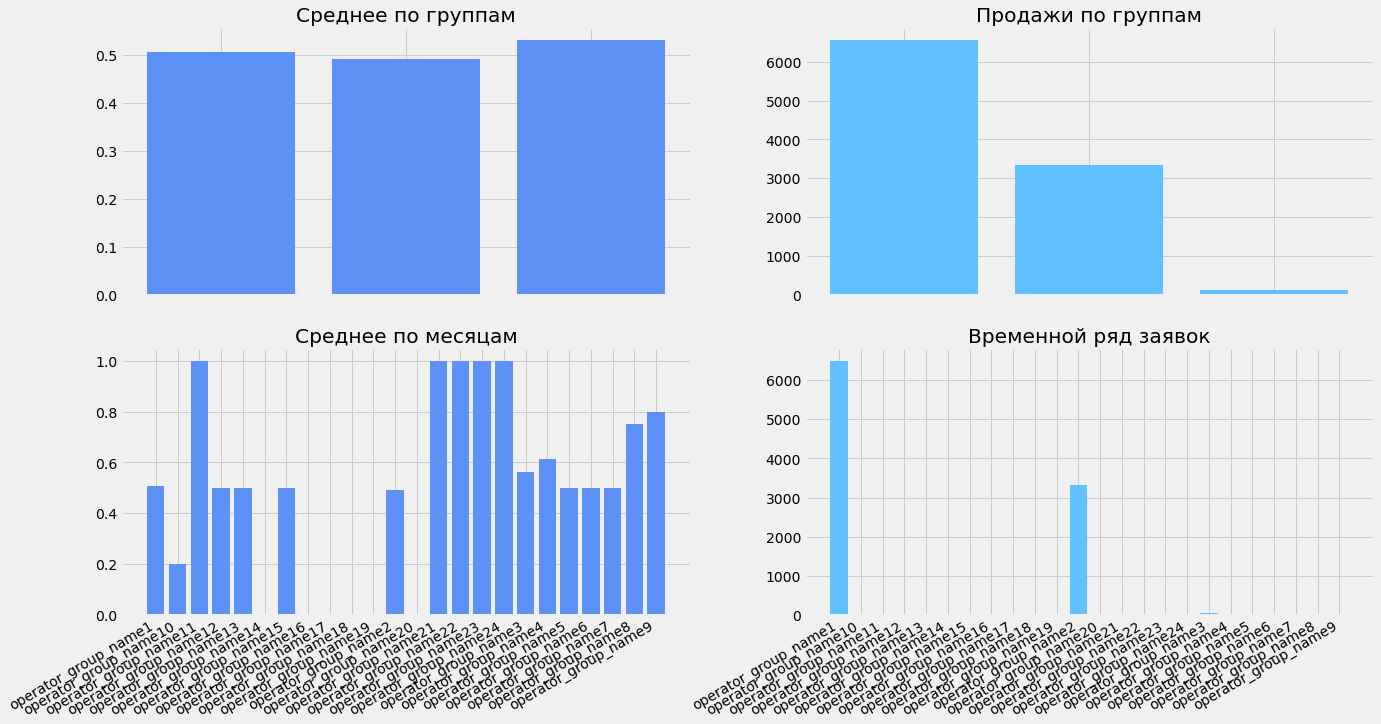

In [30]:
vis_operator_group_mean = df3.groupby('operator_group_type')['is_paid'].mean()
vis_operator_group_count = df3.groupby('operator_group_type')['is_paid'].count()

vis_group_name_mean = df3.groupby('operator_group_name')['is_paid'].mean()
vis_group_name_count = df3.groupby('operator_group_name')['is_paid'].count()

fig, ax = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = ax.flatten()
fig.set_size_inches(20, 12)
fig.autofmt_xdate()

ax1.bar(vis_operator_group_mean.index, vis_operator_group_mean, color='#5D91F5')
ax1.set_title('Среднее по группам')

ax2.bar(vis_operator_group_count.index, vis_operator_group_count, color='#61C0FF')
ax2.set_title('Продажи по группам')

ax3.bar(vis_group_name_mean.index, vis_group_name_mean, color='#5D91F5')
ax3.set_title('Среднее по месяцам')

ax4.bar(vis_group_name_count.index, vis_group_name_count, color='#61C0FF')
ax4.set_title('Временной ряд заявок')

У третьй группы - продажи лучши, почемубы не **увеличить количество заявок, отправляемых в 3-ю группу.** Немного возрастёт 
количество конверсий в продажу. Некоторые операторы совсем не работают - нужно их подбодрить) Либо выбрать репрезентативную выборку. Возможно просто идёт слишком большая нагрузка на  некоторых операторов, в следствии чего может падать конверсия.

p-value выборок по часов 2-го звонка:  0.16086202487192372


Text(0.5, 1.0, 'Количество пришедших пользователей')

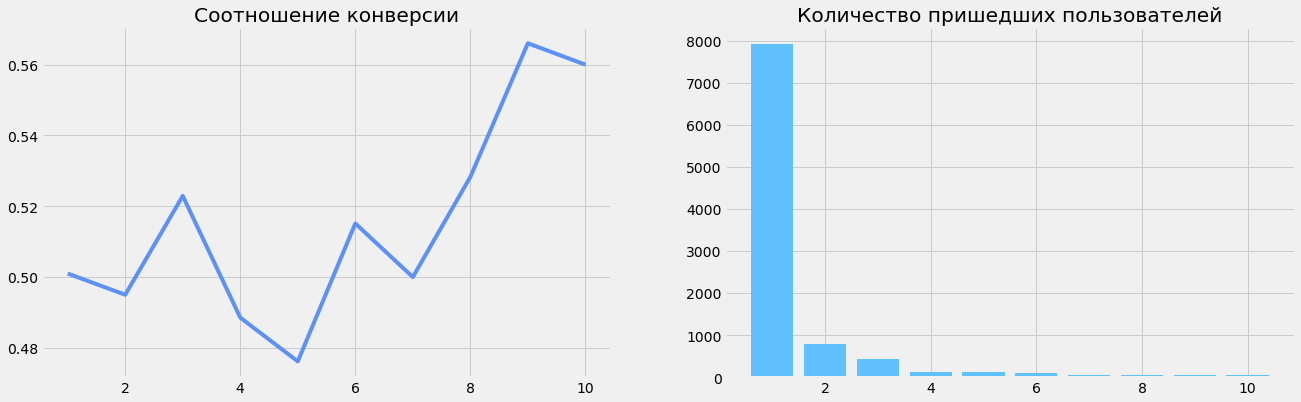

In [31]:
#Пришло время для самой интереснной фичи - qcut_reach_call
#Разберусь с ним также как и с остальными. Визуализирую разницу между выборками 
#И проверю статистическую значимость разницы. C помощью ленивой ANOVA)

vis_qcut_reach_call_mean = df3.groupby('qcut_reach_call')['is_paid'].mean()
vis_qcut_reach_call_count = df3.groupby('qcut_reach_call')['is_paid'].count()

samples = c_for_test('application_datetimehour', 10)
F, p = stats.mstats.f_oneway(samples[0], samples[1], samples[2], 
                            samples[3], samples[4], samples[5],
                            samples[6], samples[7], samples[8], samples[9])
print('p-value выборок по часов 2-го звонка: ', p)

fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.flatten()
fig.set_size_inches(20, 6)

ax1.plot(vis_source_mean.index, vis_source_mean, color='#5D91F5')
ax1.set_title('Соотношение конверсии')

ax2.bar(vis_source_count.index, vis_source_count, color='#61C0FF')
ax2.set_title('Количество пришедших пользователей')

Сразу видно, что менеджерам стоит сказать, что намного выгодней **перезвонить через 10 часов**. Лучше людей не отвлекать.  Однако, скорее всего, не хватает данных для вывода. Но точно можно сказать, что через 4-5 часа лучше не перезванивать. При этом интересно, что перезванивать сразу не обязательно. Я уж хотел строить прогноз нагрузки колл-центра, но зачем, когда перезвонить можно и даже нужно через 9 часов?

Text(0.5, 1.0, 'Временной ряд заявок')

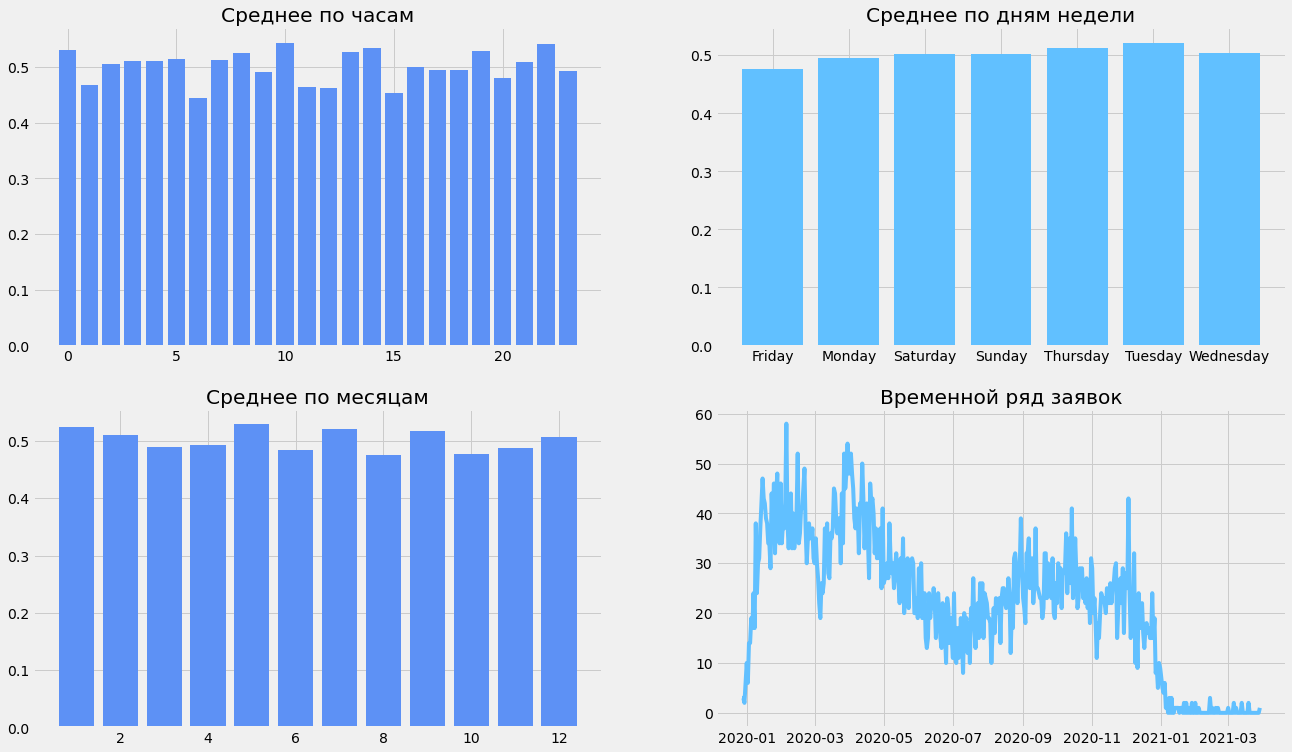

In [32]:
vis_hour_mean = df3.groupby('trial_appointment_datetimehour')['is_paid'].mean()
vis_weekday_mean = df3.groupby('trial_appointment_datetimeweekday')['is_paid'].mean()
vis_month_mean = df3.groupby('trial_appointment_datetimemonth')['is_paid'].mean()

vis_resample = df3['is_paid']
vis_resample.index = df['trial_appointment_datetime']
vis_resample = vis_resample.resample('D').count()

fig, ax = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = ax.flatten()
fig.set_size_inches(20, 12)

ax1.bar(vis_hour_mean.index, vis_hour_mean, color='#5D91F5')
ax1.set_title('Среднее по часам')

ax2.bar(vis_weekday_mean.index, vis_weekday_mean, color='#61C0FF')
ax2.set_title('Среднее по дням недели')

ax3.bar(vis_month_mean.index, vis_month_mean, color='#5D91F5')
ax3.set_title('Среднее по месяцам')

ax4.plot(vis_resample.index, vis_resample, color='#61C0FF')
ax4.set_title('Временной ряд заявок')

В месяцах и часах всё идентично , а вот у дней недели можно увидеть мизерную тенденцию. Проверю её ановой - есть ли закономерность? 

In [33]:
weekday = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
          'Tuesday', 'Wednesday']
def c_for_test_weekday(column):
    samples = []
    for i in weekday:
        samples.append(list(df3[df3[column] == i]['is_paid']))
    return samples

samples = c_for_test_weekday('trial_appointment_datetimeweekday')
F, p = stats.mstats.f_oneway(samples[0], samples[1], samples[2], 
                            samples[3], samples[4], samples[5],
                            samples[6])
print("Нулевая гипотеза о равенстве средних отвергается: ", p)

Нулевая гипотеза о равенстве средних отвергается:  0.33000724033535656


Следовательно лучший день, который принесет больше конверсий, - Tuesday и Thursday - **назначать пробные занятия лучше на них**

## 4. Помимо визуализаций и статистических тестов помогут в той задачи - модель машинного обучения с регуляризацией

In [34]:
df4 = df3.copy()

<AxesSubplot:>

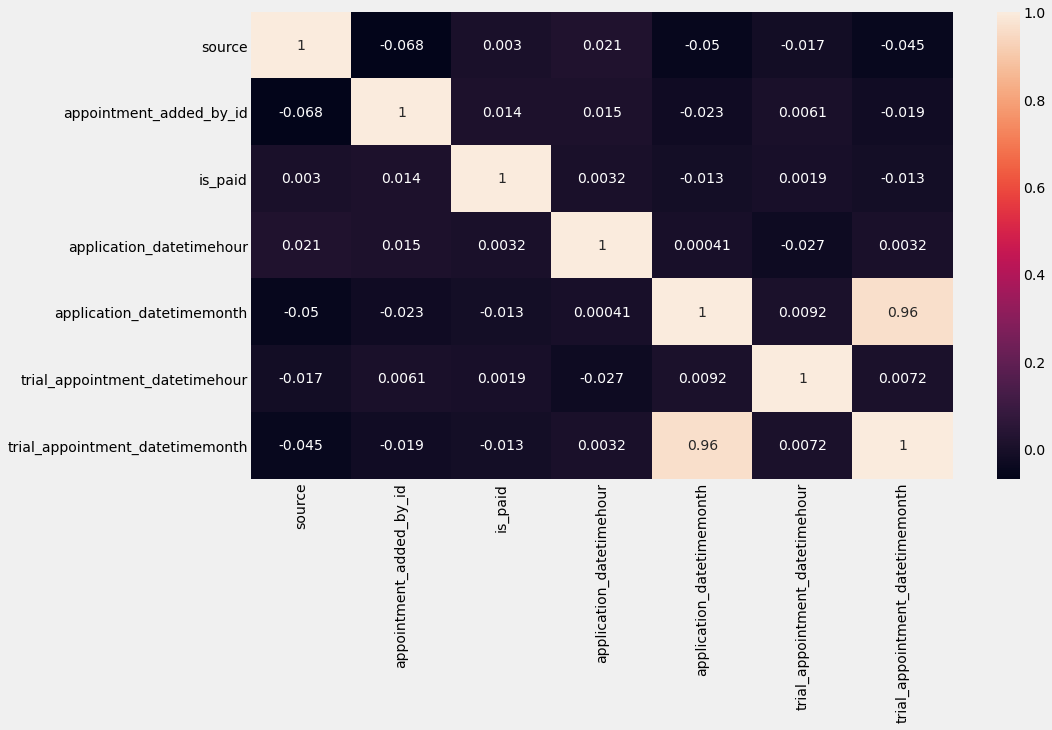

In [35]:
#Мда, корреляция похоронная.
corr = df4.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True)

In [36]:
col_to_dummie = ['gender', 'source', 'operator_group_type', 'operator_group_name',
                'application_datetimeweekday', 'qcut_reach_call', 'trial_appointment_datetimeweekday']

df4['application_datetimehour'] = np.cos(df4['application_datetimehour'])
df4['application_datetimemonth'] = np.cos(df4['application_datetimemonth'])
df4['trial_appointment_datetimehour'] = np.cos(df4['trial_appointment_datetimehour'])
df4['trial_appointment_datetimemonth'] = np.cos(df4['trial_appointment_datetimemonth'])

df4.drop(['application_datetime', 'trial_appointment_datetime', 'appointment_added_by_id'], axis=1, inplace=True)
df4_dummie = pd.get_dummies(df4, columns=col_to_dummie, drop_first=True)
df4_dummie

,is_paid,application_datetimehour,application_datetimemonth,trial_appointment_datetimehour,trial_appointment_datetimemonth,gender_1.0,gender_unknow,source_2,source_3,source_4,...,qcut_reach_call_7,qcut_reach_call_8,qcut_reach_call_9,qcut_reach_call_10,trial_appointment_datetimeweekday_Monday,trial_appointment_datetimeweekday_Saturday,trial_appointment_datetimeweekday_Sunday,trial_appointment_datetimeweekday_Thursday,trial_appointment_datetimeweekday_Tuesday,trial_appointment_datetimeweekday_Wednesday
0,0,-0.653644,-0.653644,-0.759688,-0.653644,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,-0.989992,0.753902,-0.759688,0.753902,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,-0.989992,-0.416147,0.753902,-0.416147,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.960170,0.283662,0.907447,0.283662,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,-0.547729,-0.416147,0.283662,-0.416147,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.283662,-0.839072,0.988705,-0.839072,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9996,1,0.960170,-0.989992,-0.416147,-0.989992,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9997,1,0.660317,0.540302,-0.957659,0.540302,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9998,0,-0.989992,-0.839072,0.753902,-0.839072,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
X = df4_dummie.drop('is_paid', axis=1)
y = df4_dummie['is_paid']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [38]:
#В общем модель просто угадывает, но всё равно пойдёт, для оценки влияния фичей на целевую перменную
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lasso = LogisticRegression(penalty='l2')
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print(classification_report(y_pred_lasso, y_test))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46      1098
           1       0.56      0.49      0.52      1402

    accuracy                           0.49      2500
   macro avg       0.50      0.50      0.49      2500
weighted avg       0.50      0.49      0.50      2500



<BarContainer object of 10 artists>

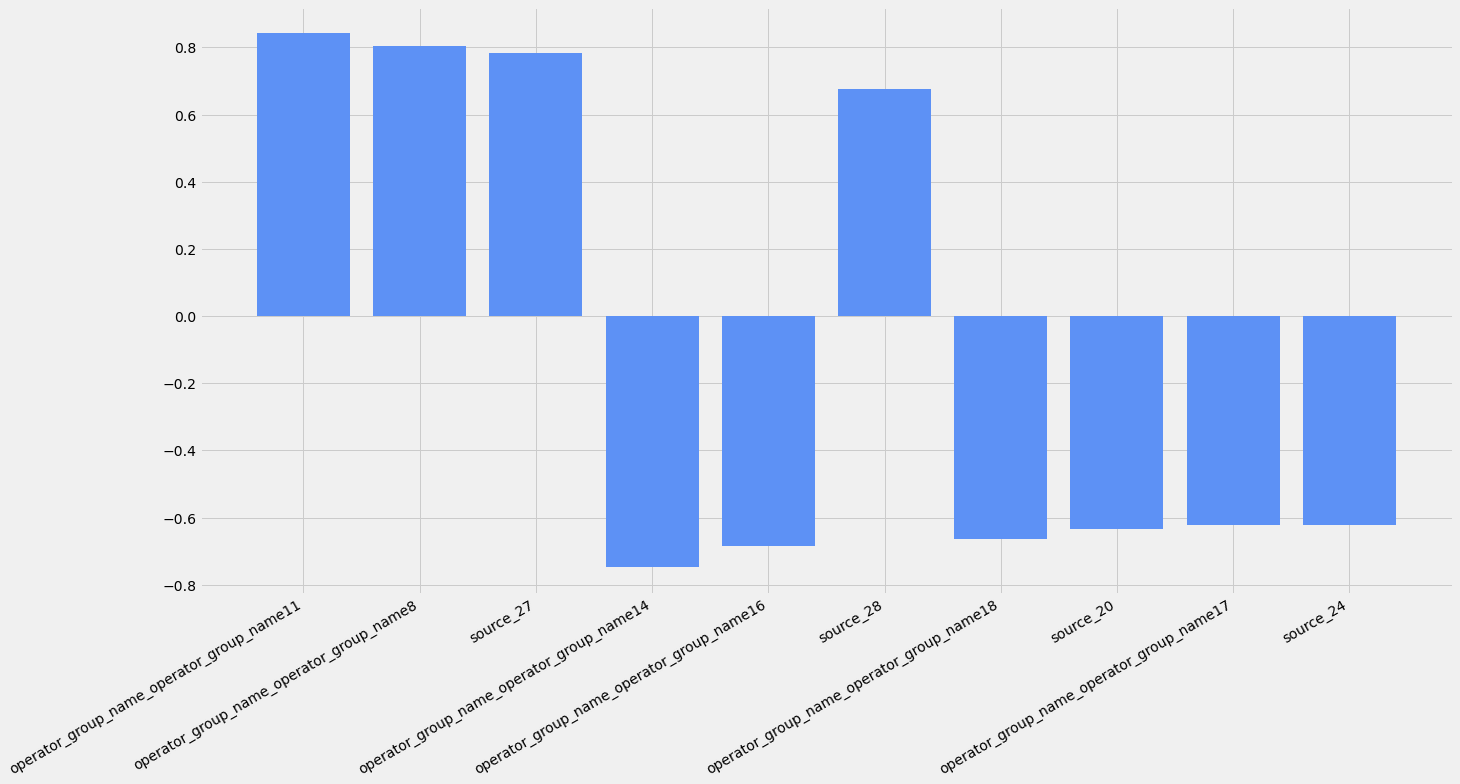

In [39]:
col_names = X.columns
coef = lasso.coef_.flatten()
vis_coef = pd.DataFrame(coef, index=col_names, columns=['coef'])
vis_coef['x'] = abs(vis_coef['coef'])
vis_coef = vis_coef.sort_values(by='x', ascending=False).drop('x', axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20, 12)
fig.autofmt_xdate()

ax.bar(vis_coef.index[:10], vis_coef['coef'].head(10), color='#5D91F5')

Линейная модель показывает, что всё-таки решающую роль играют сами операторы и ресурс с которого к нам пришли клиенты. Можно заключить следующее:
* Увеличить количество прозвонов у оператор group_name11 и group_name8
* Наказать операторов group_name14 и group_name15, 12
* Увеличить поток клиентов из ресурсов 28, 27
* Уменьшить из 21, 24

## Резюме

Прежде хочу сказать, что зависимости целевой переменной от фичей едва уловимы. Возможно, причины в этом 2 - нерепрезентативная выборка и то, что перемешанны данные людей из разных часовых поясов. Но, тем не менее, при острой необходимости, можно определить следующие рекомендации для роста C1: 

* Увеличить количество прозвонов у оператор group_name11 и group_name8
* Наказать операторов group_name14 и group_name15, 12
* Увеличить поток клиентов из ресурсов 28, 27
* Уменьшить из 21, 24
* Увеличить объем трафика на источники 8-10
* Ввести акции на новый год
* Увеличить количество заявок, отправляемых в 3-ю группу
* Если человек не берет трубку - перезвонить лучше через 8-10 часов
* Вторник и четверг - лучшие дни для пробных занятий

К преведенным выше предложением стоит отнестись как к гипотезам, которые лучше реализовать в рамках A-B теста

При этом отмечу, что имеет большую важность сами скрипты работы менеджеров и преподавателей. А если эти скрипты ещё и размечены, то можно составить рекомендации по разговорам с учениками, которые существенно увеличат С1.